In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re
import pandas as pd
import string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
nltk.download('stopwords')
set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /Users/AVITA/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [3]:
data=pd.read_csv("train.csv")

In [4]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
alphanumeric=lambda x: re.sub('\w*\d\w*',' ',x)
punc_lower=lambda x:re.sub('[%s]' % re.escape(string.punctuation),' ',x.lower())
remove_n=lambda x:re.sub("\n"," ",x)
remove_non_ascii=lambda x:re.sub(r'[^\x00-\x7f]',r' ',x)

In [7]:
data["comment_text"]=data["comment_text"].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
data.comment_text.head()

0    explanation why the edits made under my userna...
1    d aww  he matches this background colour i m s...
2    hey man  i m really not trying to edit war  it...
3      more i can t make any real suggestions on im...
4    you  sir  are my hero  any chance you remember...
Name: comment_text, dtype: object

In [8]:
data.toxic.value_counts(normalize=True)
toxic_feat=data.iloc[:,2:].sum()

In [9]:
toxic_feat

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [10]:
num_rows=len(data)
print(num_rows)

159571


In [11]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [12]:
tox_per=data["toxic"].sum() / num_rows*100
sevTox_per=data["severe_toxic"].sum() / num_rows*100
obs_per=data["obscene"].sum() / num_rows*100
thr_per=data["threat"].sum() / num_rows*100
ins_per=data["insult"].sum() / num_rows*100
hate_per=data["identity_hate"].sum() / num_rows*100

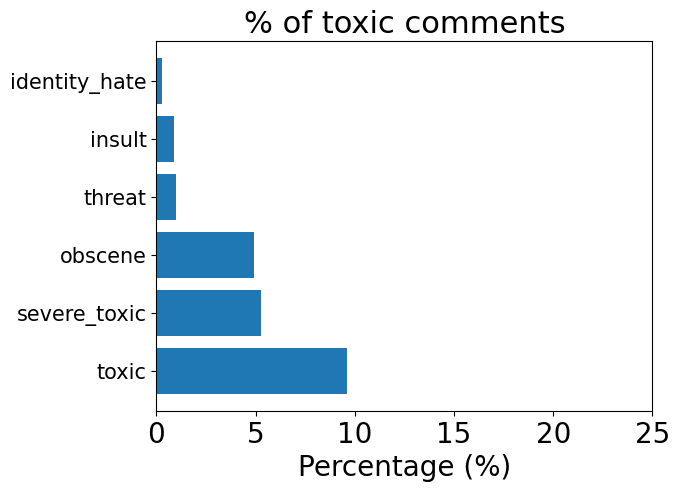

In [13]:
ind=np.arange(6)
graph=plt.barh(ind,[tox_per,obs_per,ins_per,sevTox_per,hate_per,thr_per])
plt.xlabel("Percentage (%)",size=20)
plt.title('% of toxic comments',size=22)
plt.xticks(np.arange(0,30,5),size=20)
plt.yticks(ind,('toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate',),size=15)
plt.show()

In [14]:
pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
Note: you may need to restart the kernel to use updated packages.


In [15]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

data_tox=data.loc[:,['id','comment_text','toxic']]
data_sev=data.loc[:,['id','comment_text','severe_toxic']]
data_obs=data.loc[:,['id','comment_text','obscene']]
data_thr=data.loc[:,['id','comment_text','threat']]
data_ins=data.loc[:,['id','comment_text','insult']]
data_ide=data.loc[:,['id','comment_text','identity_hate']]

In [16]:
def wordcloud(df,label):
    subset=df[df[label]==1]
    text=subset.comment_text.values
    wc=WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(text))
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words Frequented in {}".format(label),fontsize=20)
    plt.imshow(wc.recolor(colormap="gist_earth",random_state=244),alpha=0.98)

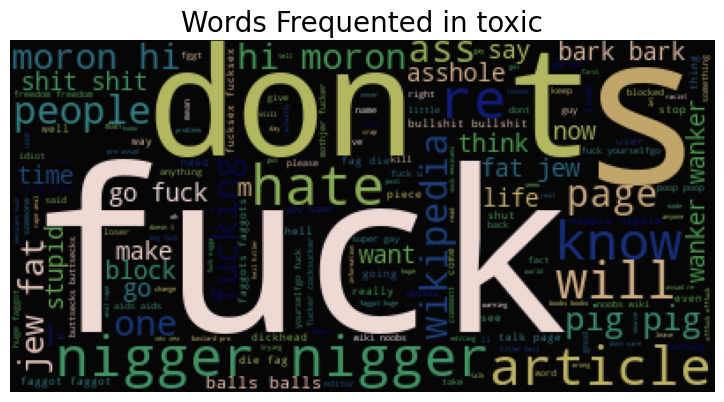

In [17]:
wordcloud(data_tox,"toxic")

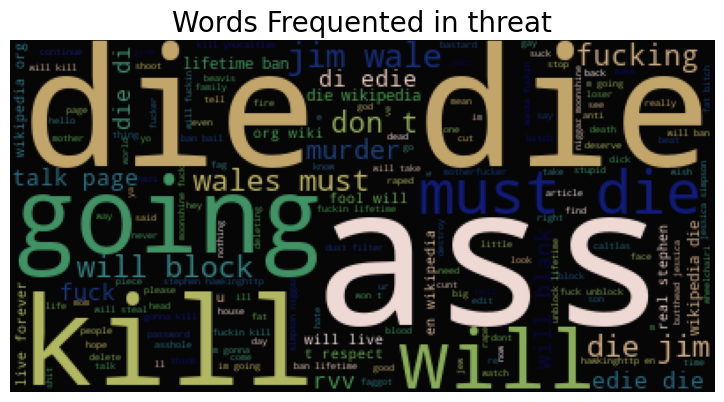

In [18]:
wordcloud(data_thr,"threat")

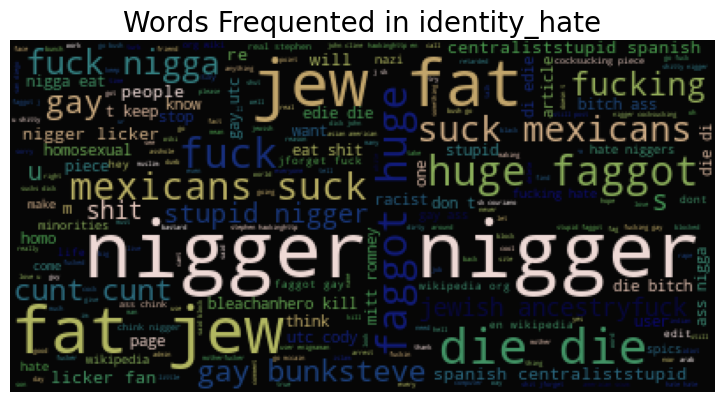

In [19]:
wordcloud(data_ide,"identity_hate")

In [20]:
data_istoxic=data_tox[data_tox["toxic"]==1].iloc[:5000,:]
data_nontoxic=data_tox[data_tox["toxic"]==0].iloc[:5000,:]
data_Toxic=pd.concat([data_istoxic,data_nontoxic],axis=0)
data_Toxic.shape

(10000, 3)

In [21]:
data_sev[data_sev["severe_toxic"]==1].count()

id              1595
comment_text    1595
severe_toxic    1595
dtype: int64

In [23]:
data_isSev=data_sev[data_sev["severe_toxic"]==1].iloc[0:1595,:]
data_nonSev=data_sev[data_sev["severe_toxic"]==0].iloc[0:1595,:]
data_severeToxic=pd.concat([data_isSev,data_nonSev],axis=0)
data_severeToxic.shape

(3190, 3)

In [24]:
data_obs[data_obs["obscene"]==1].count()

id              8449
comment_text    8449
obscene         8449
dtype: int64

In [25]:
data_isObs=data_obs[data_obs["obscene"]==1].iloc[0:5000,:]
data_nonObs=data_obs[data_obs["obscene"]==0].iloc[0:5000,:]
data_Obscene=pd.concat([data_isObs,data_nonObs],axis=0)
data_Obscene.shape

(10000, 3)

In [26]:
data_thr[data_thr["threat"]==1].count()

id              478
comment_text    478
threat          478
dtype: int64

In [27]:
data_isThr=data_thr[data_thr["threat"]==1].iloc[0:478,:]
data_nonThr=data_thr[data_thr["threat"]==0].iloc[0:1912,:]
data_Threat=pd.concat([data_isThr,data_nonThr],axis=0)

In [28]:
data_ins[data_ins["insult"]==1].count()

id              7877
comment_text    7877
insult          7877
dtype: int64

In [29]:
data_isIns=data_ins[data_ins["insult"]==1].iloc[0:5000,:]
data_nonIns=data_ins[data_ins["insult"]==0].iloc[0:5000,:]
data_Insult=pd.concat([data_isIns,data_nonIns],axis=0)

In [30]:
data_ide[data_ide["identity_hate"]==1].count()

id               1405
comment_text     1405
identity_hate    1405
dtype: int64

In [31]:
data_isIde=data_ide[data_ide["identity_hate"]==1].iloc[0:1405,:]
data_nonIde=data_ide[data_ide["identity_hate"]==0].iloc[0:5620,:]
data_Hate=pd.concat([data_isIde,data_nonIde],axis=0)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,precision_score,recall_score

In [37]:
def model_train(data_toxicFeat,label,vectorizer,ngram):
    X=data_toxicFeat.comment_text
    y=data_toxicFeat[label]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    vect=vectorizer(ngram_range=(ngram),stop_words="english")
    X_train_vect=vect.fit_transform(X_train)
    X_test_vect=vect.transform(X_test)
    lr=LogisticRegression()
    lr.fit(X_train_vect,y_train)
    print("Logistic Regression Done")
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_vect,y_train)
    print("KNearestNeighbours Done")
    
    bnb=BernoulliNB()
    bnb.fit(X_train_vect,y_train)
    print("BernoulliNB done")

    mnb=MultinomialNB()
    mnb.fit(X_train_vect,y_train)
    print("Multinomial Done")

    svm_model=LinearSVC()
    svm_model.fit(X_train_vect,y_train)
    print("SupportVectorClassifier done")
    
    randomforest=RandomForestClassifier(n_estimators=100,random_state=42)
    randomforest.fit(X_train_vect,y_train)
    print("RandomForest done")

    f1_score_data={'F1 Score ({})'.format(label):
    [f1_score(lr.predict(X_test_vect),y_test),
    f1_score(knn.predict(X_test_vect),y_test),
    f1_score(bnb.predict(X_test_vect),y_test),
    f1_score(mnb.predict(X_test_vect),y_test),
    f1_score(svm_model.predict(X_test_vect),y_test),
    f1_score(randomforest.predict(X_test_vect),y_test)   ]}
    
    precision_score_data={'Precision Score ({})'.format(label):
    [precision_score(lr.predict(X_test_vect),y_test),
    precision_score(knn.predict(X_test_vect),y_test),
    precision_score(bnb.predict(X_test_vect),y_test),
    precision_score(mnb.predict(X_test_vect),y_test),
    precision_score(svm_model.predict(X_test_vect),y_test),
    precision_score(randomforest.predict(X_test_vect),y_test)]}
        
    recall_score_data={'recall Score ({})'.format(label):
    [recall_score(lr.predict(X_test_vect),y_test),
    recall_score(knn.predict(X_test_vect),y_test),
    recall_score(bnb.predict(X_test_vect),y_test),
    recall_score(mnb.predict(X_test_vect),y_test),
    recall_score(svm_model.predict(X_test_vect),y_test),
    recall_score(randomforest.predict(X_test_vect),y_test)]}
    
    data_f1=pd.DataFrame(f1_score_data,index=["Log Regression","KNN","BernoulliNB","MultinomialNB","SVM","Random Forest"])
    data_precision=pd.DataFrame(precision_score_data,index=["Log Regression","KNN","BernoulliNB","MultinomialNB","SVM","Random Forest"])
    data_recall=pd.DataFrame(recall_score_data,index=["Log Regression","KNN","BernoulliNB","MultinomialNB","SVM","Random Forest"])
    
    return data_f1,data_precision,data_recall



In [38]:
df_tox=model_train(data_Toxic,"toxic",TfidfVectorizer,(1,1))

Logistic Regression Done
KNearestNeighbours Done
BernoulliNB done
Multinomial Done
SupportVectorClassifier done


/Users/AVITA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForest done


In [39]:
df_tox

(                F1 Score (toxic)
 Log Regression          0.861234
 KNN                     0.153293
 BernoulliNB             0.776521
 MultinomialNB           0.874958
 SVM                     0.876133
 Random Forest           0.838055,
                 Precision Score (toxic)
 Log Regression                 0.821731
 KNN                            0.083279
 BernoulliNB                    0.938191
 MultinomialNB                  0.849057
 SVM                            0.849057
 Random Forest                  0.779440,
                 recall Score (toxic)
 Log Regression              0.904728
 KNN                         0.962406
 BernoulliNB                 0.662379
 MultinomialNB               0.902490
 SVM                         0.904993
 Random Forest               0.906203)

In [40]:
df_sev=model_train(data_severeToxic,"severe_toxic",TfidfVectorizer,(1,1))
df_sev

Logistic Regression Done
KNearestNeighbours Done
BernoulliNB done
Multinomial Done
SupportVectorClassifier done


/Users/AVITA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForest done


(                F1 Score (severe_toxic)
 Log Regression                 0.927879
 KNN                            0.856322
 BernoulliNB                    0.803707
 MultinomialNB                  0.936170
 SVM                            0.926004
 Random Forest                  0.934874,
                 Precision Score (severe_toxic)
 Log Regression                        0.896050
 KNN                                   0.929314
 BernoulliNB                           0.991684
 MultinomialNB                         0.960499
 SVM                                   0.910603
 Random Forest                         0.925156,
                 recall Score (severe_toxic)
 Log Regression                     0.962054
 KNN                                0.793961
 BernoulliNB                        0.675637
 MultinomialNB                      0.913043
 SVM                                0.941935
 Random Forest                      0.944798)

In [41]:
df_obs=model_train(data_Obscene,"obscene",TfidfVectorizer,(1,1))
df_obs

Logistic Regression Done
KNearestNeighbours Done
BernoulliNB done
Multinomial Done
SupportVectorClassifier done


/Users/AVITA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForest done


(                F1 Score (obscene)
 Log Regression            0.908655
 KNN                       0.243320
 BernoulliNB               0.787830
 MultinomialNB             0.901463
 SVM                       0.921378
 Random Forest             0.908356,
                 Precision Score (obscene)
 Log Regression                   0.864021
 KNN                              0.139232
 BernoulliNB                      0.951854
 MultinomialNB                    0.901757
 SVM                              0.895901
 Random Forest                    0.877033,
                 recall Score (obscene)
 Log Regression                0.958153
 KNN                           0.963964
 BernoulliNB                   0.672026
 MultinomialNB                 0.901170
 SVM                           0.948347
 Random Forest                 0.941999)

In [42]:
df_thr=model_train(data_Threat,"threat",TfidfVectorizer,(1,1))
df_thr

Logistic Regression Done
KNearestNeighbours Done
BernoulliNB done
Multinomial Done
SupportVectorClassifier done


/Users/AVITA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForest done


(                F1 Score (threat)
 Log Regression           0.628821
 KNN                      0.720000
 BernoulliNB              0.311828
 MultinomialNB            0.504762
 SVM                      0.786765
 Random Forest            0.795539,
                 Precision Score (threat)
 Log Regression                  0.467532
 KNN                             0.642857
 BernoulliNB                     0.188312
 MultinomialNB                   0.344156
 SVM                             0.694805
 Random Forest                   0.694805,
                 recall Score (threat)
 Log Regression               0.960000
 KNN                          0.818182
 BernoulliNB                  0.906250
 MultinomialNB                0.946429
 SVM                          0.906780
 Random Forest                0.930435)

In [43]:
df_ins=model_train(data_Insult,"insult",TfidfVectorizer,(1,1))
df_ins

Logistic Regression Done
KNearestNeighbours Done
BernoulliNB done
Multinomial Done
SupportVectorClassifier done


/Users/AVITA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForest done


(                F1 Score (insult)
 Log Regression           0.896599
 KNN                      0.226307
 BernoulliNB              0.783762
 MultinomialNB            0.897411
 SVM                      0.902619
 Random Forest            0.883993,
                 Precision Score (insult)
 Log Regression                  0.857515
 KNN                             0.128172
 BernoulliNB                     0.942095
 MultinomialNB                   0.890696
 SVM                             0.874431
 Random Forest                   0.835394,
                 recall Score (insult)
 Log Regression               0.939416
 KNN                          0.965686
 BernoulliNB                  0.670992
 MultinomialNB                0.904227
 SVM                          0.932686
 Random Forest                0.938596)

In [44]:
df_ide=model_train(data_Hate,"identity_hate",TfidfVectorizer,(1,1))
df_ide

Logistic Regression Done
KNearestNeighbours Done
BernoulliNB done
Multinomial Done
SupportVectorClassifier done


/Users/AVITA/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


RandomForest done


(                F1 Score (identity_hate)
 Log Regression                  0.699029
 KNN                             0.161826
 BernoulliNB                     0.549206
 MultinomialNB                   0.485857
 SVM                             0.797516
 Random Forest                   0.768448,
                 Precision Score (identity_hate)
 Log Regression                         0.572727
 KNN                                    0.088636
 BernoulliNB                            0.393182
 MultinomialNB                          0.331818
 SVM                                    0.729545
 Random Forest                          0.686364,
                 recall Score (identity_hate)
 Log Regression                      0.896797
 KNN                                 0.928571
 BernoulliNB                         0.910526
 MultinomialNB                       0.906832
 SVM                                 0.879452
 Random Forest                       0.872832)

In [46]:
f1_all=pd.concat([df_tox[0],df_sev[0],df_obs[0],df_ins[0],df_thr[0],df_ide[0]],axis=1)

In [47]:
f1_all

,F1 Score (toxic),F1 Score (severe_toxic),F1 Score (obscene),F1 Score (insult),F1 Score (threat),F1 Score (identity_hate)
Log Regression,0.861234,0.927879,0.908655,0.896599,0.628821,0.699029
KNN,0.153293,0.856322,0.243320,0.226307,0.720000,0.161826
BernoulliNB,0.776521,0.803707,0.787830,0.783762,0.311828,0.549206
MultinomialNB,0.874958,0.936170,0.901463,0.897411,0.504762,0.485857
SVM,0.876133,0.926004,0.921378,0.902619,0.786765,0.797516
Random Forest,0.838055,0.934874,0.908356,0.883993,0.795539,0.768448


In [48]:
f1_all_trp=f1_all.transpose()
f1_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
F1 Score (toxic),0.861234,0.153293,0.776521,0.874958,0.876133,0.838055
F1 Score (severe_toxic),0.927879,0.856322,0.803707,0.936170,0.926004,0.934874
F1 Score (obscene),0.908655,0.243320,0.787830,0.901463,0.921378,0.908356
F1 Score (insult),0.896599,0.226307,0.783762,0.897411,0.902619,0.883993
F1 Score (threat),0.628821,0.720000,0.311828,0.504762,0.786765,0.795539
F1 Score (identity_hate),0.699029,0.161826,0.549206,0.485857,0.797516,0.768448


In [49]:
Precision_all=pd.concat([df_tox[1],df_sev[1],df_obs[1],df_ins[1],df_thr[1],df_ide[1]],axis=1)

In [50]:
Precision_all_trp=Precision_all.transpose()
Precision_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
Precision Score (toxic),0.821731,0.083279,0.938191,0.849057,0.849057,0.779440
Precision Score (severe_toxic),0.896050,0.929314,0.991684,0.960499,0.910603,0.925156
Precision Score (obscene),0.864021,0.139232,0.951854,0.901757,0.895901,0.877033
Precision Score (insult),0.857515,0.128172,0.942095,0.890696,0.874431,0.835394
Precision Score (threat),0.467532,0.642857,0.188312,0.344156,0.694805,0.694805
Precision Score (identity_hate),0.572727,0.088636,0.393182,0.331818,0.729545,0.686364


In [51]:
Recall_all=pd.concat([df_tox[2],df_sev[2],df_obs[2],df_ins[2],df_thr[2],df_ide[2]],axis=1)
Recall_all_trp=Recall_all.transpose()
Recall_all_trp

,Log Regression,KNN,BernoulliNB,MultinomialNB,SVM,Random Forest
recall Score (toxic),0.904728,0.962406,0.662379,0.902490,0.904993,0.906203
recall Score (severe_toxic),0.962054,0.793961,0.675637,0.913043,0.941935,0.944798
recall Score (obscene),0.958153,0.963964,0.672026,0.901170,0.948347,0.941999
recall Score (insult),0.939416,0.965686,0.670992,0.904227,0.932686,0.938596
recall Score (threat),0.960000,0.818182,0.906250,0.946429,0.906780,0.930435
recall Score (identity_hate),0.896797,0.928571,0.910526,0.906832,0.879452,0.872832


In [52]:
data[data["toxic"]==1]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1,1,1,0,1,0
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1,0,0,0,0,0
16,0007e25b2121310b,bye don t look come or think of comming ba...,1,0,0,0,0,0
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1,0,1,0,1,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,our previous conversation you fucking sh...,1,0,1,0,1,1
159514,ff39a2895fc3b40e,you are a mischievious pubic hair,1,0,0,0,1,0
159541,ffa33d3122b599d6,your absurd edits your absurd edits on great...,1,0,1,0,1,0
159546,ffb47123b2d82762,hey listen don t you ever delete my edi...,1,0,0,0,1,0


In [53]:
db_toxic=data.loc[:,["comment_text","toxic"]]
db_toxic.sample(10)

,comment_text,toxic
7612,melt flow re i think it is flow you can...,0
131675,someone changed the entire quote to be italici...,0
69300,revision history of dead mall sorry about ...,0
93903,what would you call indianizing articles and a...,0
135456,i guess we ll have to wait for north korea s p...,0
109255,what itunes can do versus what the iphone ca...,0
50606,reply to your question on my talk page repl...,0
110690,sama licks that is exactly what user dileepk...,0
147532,i m both ugly and unsuccesful in life also,0
21695,welcome hello and welcome to wikipedia t...,0


In [54]:
db_toxic.shape

(159571, 2)

In [55]:
db_Toxic=db_toxic[db_toxic["toxic"]==1].iloc[0:15000,:]
db_nonToxic=db_toxic[db_toxic["toxic"]==0].iloc[0:15000,:]
toxic_dataset=pd.concat([db_Toxic,db_nonToxic],axis=0)
toxic_dataset.shape

(30000, 2)

In [56]:
from sklearn.pipeline import Pipeline
X=toxic_dataset["comment_text"]
y=toxic_dataset["toxic"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
steps=[("vectorizer",TfidfVectorizer(ngram_range=(1,1),stop_words="english")),('randomforest',RandomForestClassifier(n_estimators=100,random_state=42))]

In [58]:
pipe=Pipeline(steps)
steps

[('vectorizer', TfidfVectorizer(stop_words='english')),
 ('randomforest', RandomForestClassifier(random_state=42))]

In [59]:
pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('randomforest', RandomForestClassifier(random_state=42))])

In [61]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [62]:
f1Score=f1_score(y_test,y_pred)
print(f1Score)

0.8539405379896179


In [63]:
preScore=precision_score(y_test,y_pred)
print(preScore)

0.9236855538540072


In [64]:
reScore=recall_score(y_test,y_pred)
print(reScore)

0.7939885914874946


In [65]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,y_pred)
print("Accuracy_Score",accu)

Accuracy_Score 0.8624444444444445


In [66]:
text="love you"
y=pipe.predict([text])
y[0]

0

In [67]:
text="kill you"
y=pipe.predict([text])
y[0]

1